In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os



os.environ['KAGGLE_USERNAME']="spmithun"
os.environ['KAGGLE_KEY']="9b08ee26fd9bc1e67b2b7d49c4691f53"



!kaggle datasets download -d jessicali9530/stanford-cars-dataset

 99% 1.81G/1.82G [00:08<00:00, 209MB/s]
100% 1.82G/1.82G [00:08<00:00, 221MB/s]


In [ ]:
!unzip /content/stanford-cars-dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: cars_train/cars_train/03145.jpg  
  inflating: cars_train/cars_train/03146.jpg  
  inflating: cars_train/cars_train/03147.jpg  
  inflating: cars_train/cars_train/03148.jpg  
  inflating: cars_train/cars_train/03149.jpg  
  inflating: cars_train/cars_train/03150.jpg  
  inflating: cars_train/cars_train/03151.jpg  
  inflating: cars_train/cars_train/03152.jpg  
  inflating: cars_train/cars_train/03153.jpg  
  inflating: cars_train/cars_train/03154.jpg  
  inflating: cars_train/cars_train/03155.jpg  
  inflating: cars_train/cars_train/03156.jpg  
  inflating: cars_train/cars_train/03157.jpg  
  inflating: cars_train/cars_train/03158.jpg  
  inflating: cars_train/cars_train/03159.jpg  
  inflating: cars_train/cars_train/03160.jpg  
  inflating: cars_train/cars_train/03161.jpg  
  inflating: cars_train/cars_train/03162.jpg  
  inflating: cars_train/cars_train/03163.jpg  
  inflating: cars_train/cars_train/03164.jpg  
  inflati

In [7]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
import torch
from torchvision import models
import cv2
import pandas as pd

In [8]:
import pandas as pd
data_directory = "/content/Cars"
train_images = "/content/Cars/cars_train/cars_train"


In [9]:
import cv2
import os

input_dim = (224, 224)
input_dir = "/content/Cars/images/input_images_opencv"
os.makedirs(input_dir, exist_ok=True)

for image_name in os.listdir(train_images):
    image_path = os.path.join(train_images, image_name)
    images = cv2.imread(image_path)

    # Resize the image
    resized_image = cv2.resize(images, input_dim)

    # Save the resized image
    cv2.imwrite(os.path.join(input_dir, image_name), resized_image)

    # Close the image file
    cv2.destroyAllWindows()


In [11]:
import torch
from torchvision import models

class Img2VecResnet18():
    def __init__(self):
        self.device = torch.device("cpu")
        self.numberFeatures = 512
        self.modelName = "resnet-18"
        self.model, self.featureLayer = self.getFeatureLayer()
        self.model = self.model.to(self.device)
        self.model.eval()
        self.toTensor = transforms.ToTensor()
        self.normalize = transforms.Normalize(mean = [0.485, 0.496, 0.482], std = [0.231, 0.225, 0.223])
        
        
    def getFeatureLayer(self):
        cnnModel = models.resnet18(pretrained=True)
        layer = cnnModel._modules.get('avgpool')
        self.layer_output_size = 512
        return cnnModel, layer
    
    def getVec(self,img):
        image = self.normalize(self.toTensor(img)).unsqueeze(0).to(self.device)
        embedding = torch.zeros(1, self.numberFeatures, 1, 1)
        def copyData(m, i, o): embedding.copy_(o.data)
        h= self.featureLayer.register_forward_hook(copyData)
        self.model(image)
        h.remove()
        return embedding.numpy()[0, :, 0, 0]
    
    

In [12]:
from torchvision import transforms
import tqdm
from PIL import Image
img2vec=Img2VecResnet18()
allVectors = {}
for image in tqdm.tqdm(os.listdir(input_dir)):
    I=Image.open(os.path.join(input_dir, image_name))
    vec = img2vec.getVec(I)
    allVectors[image] = vec
    I.close()


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 76.7MB/s]
100%|██████████| 8144/8144 [11:14<00:00, 12.07it/s]


In [13]:
import pandas as pd

pd.DataFrame(allVectors).transpose().to_csv(data_directory + '/input_data_vectors.csv')

In [14]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 25.1 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=72bb4bac825c001c00ac099405c07fe41d298a12661b6931739035fe806dce6d
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [15]:
from pyspark.sql.functions import col
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext('local')
spark = SparkSession(sc)

In [16]:
input_df = spark.read.option('inferSchema',True).csv(data_directory + '/input_data_vectors.csv')
input_df.columns

['_c0',
 '_c1',
 '_c2',
 '_c3',
 '_c4',
 '_c5',
 '_c6',
 '_c7',
 '_c8',
 '_c9',
 '_c10',
 '_c11',
 '_c12',
 '_c13',
 '_c14',
 '_c15',
 '_c16',
 '_c17',
 '_c18',
 '_c19',
 '_c20',
 '_c21',
 '_c22',
 '_c23',
 '_c24',
 '_c25',
 '_c26',
 '_c27',
 '_c28',
 '_c29',
 '_c30',
 '_c31',
 '_c32',
 '_c33',
 '_c34',
 '_c35',
 '_c36',
 '_c37',
 '_c38',
 '_c39',
 '_c40',
 '_c41',
 '_c42',
 '_c43',
 '_c44',
 '_c45',
 '_c46',
 '_c47',
 '_c48',
 '_c49',
 '_c50',
 '_c51',
 '_c52',
 '_c53',
 '_c54',
 '_c55',
 '_c56',
 '_c57',
 '_c58',
 '_c59',
 '_c60',
 '_c61',
 '_c62',
 '_c63',
 '_c64',
 '_c65',
 '_c66',
 '_c67',
 '_c68',
 '_c69',
 '_c70',
 '_c71',
 '_c72',
 '_c73',
 '_c74',
 '_c75',
 '_c76',
 '_c77',
 '_c78',
 '_c79',
 '_c80',
 '_c81',
 '_c82',
 '_c83',
 '_c84',
 '_c85',
 '_c86',
 '_c87',
 '_c88',
 '_c89',
 '_c90',
 '_c91',
 '_c92',
 '_c93',
 '_c94',
 '_c95',
 '_c96',
 '_c97',
 '_c98',
 '_c99',
 '_c100',
 '_c101',
 '_c102',
 '_c103',
 '_c104',
 '_c105',
 '_c106',
 '_c107',
 '_c108',
 '_c109',
 '_c110',


In [17]:
from pyspark.ml.feature import VectorAssembler

vector_columns = input_df.columns[1:]
assembler = VectorAssembler(inputCols = vector_columns, outputCol = "features")

output = assembler.transform(input_df)
output = output.select('_c0','features')

output.show(1, vertical = True)

-RECORD 0------------------------
 _c0      | null                 
 features | [0.0,1.0,2.0,3.0,... 
only showing top 1 row



In [18]:
output.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- features: vector (nullable = true)



In [19]:
from pyspark.ml.feature import BucketedRandomProjectionLSH
from pyspark.ml.feature import MinHashLSH

brp = BucketedRandomProjectionLSH(inputCol="features",outputCol="hashes", numHashTables = 200, bucketLength=2.0)
model = brp.fit(output)

In [20]:
lsh_df = model.transform(output)
lsh_df.show()

+---------+--------------------+--------------------+
|      _c0|            features|              hashes|
+---------+--------------------+--------------------+
|     null|[0.0,1.0,2.0,3.0,...|[[-18.0], [-17.0]...|
|03417.jpg|[0.861907,3.55842...|[[0.0], [0.0], [-...|
|00382.jpg|[0.861907,3.55842...|[[0.0], [0.0], [-...|
|02537.jpg|[0.861907,3.55842...|[[0.0], [0.0], [-...|
|00820.jpg|[0.861907,3.55842...|[[0.0], [0.0], [-...|
|01974.jpg|[0.861907,3.55842...|[[0.0], [0.0], [-...|
|05409.jpg|[0.861907,3.55842...|[[0.0], [0.0], [-...|
|02386.jpg|[0.861907,3.55842...|[[0.0], [0.0], [-...|
|00118.jpg|[0.861907,3.55842...|[[0.0], [0.0], [-...|
|03486.jpg|[0.861907,3.55842...|[[0.0], [0.0], [-...|
|00792.jpg|[0.861907,3.55842...|[[0.0], [0.0], [-...|
|06283.jpg|[0.861907,3.55842...|[[0.0], [0.0], [-...|
|06631.jpg|[0.861907,3.55842...|[[0.0], [0.0], [-...|
|06004.jpg|[0.861907,3.55842...|[[0.0], [0.0], [-...|
|06784.jpg|[0.861907,3.55842...|[[0.0], [0.0], [-...|
|07285.jpg|[0.861907,3.55842

In [21]:
from IPython.display import display

test_image = '/content/Cars/cars_train/cars_train/00322.jpg'

In [22]:
print(test_image)

/content/Cars/cars_train/cars_train/00322.jpg


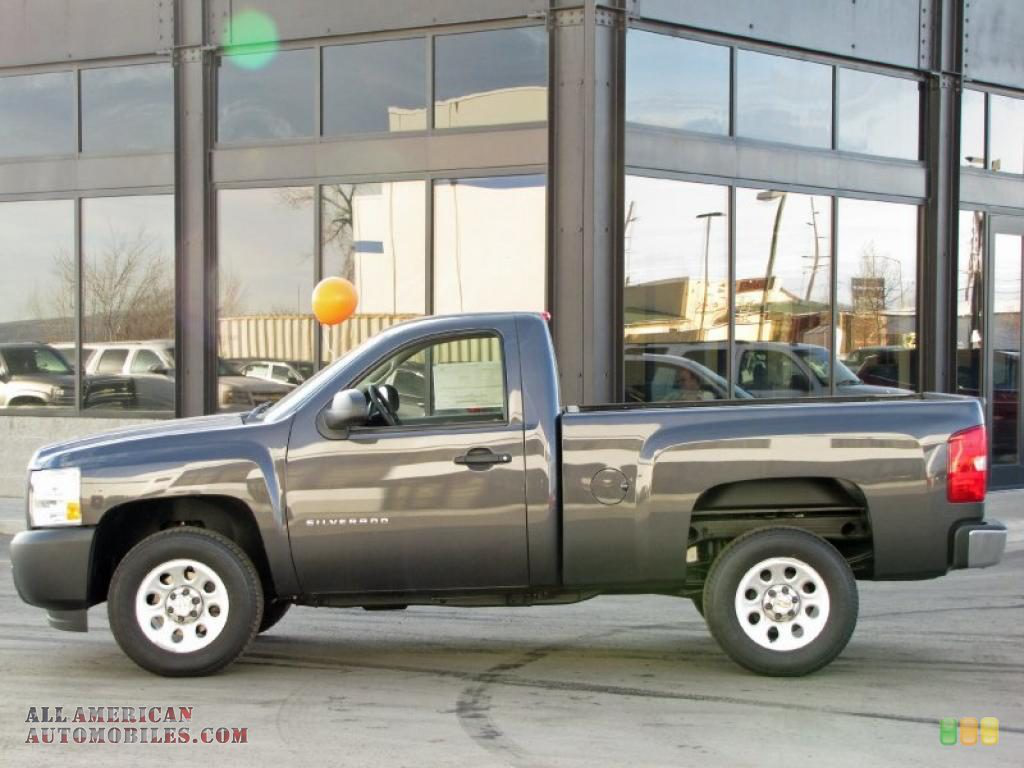

In [23]:
display(Image.open(test_image))

In [24]:
img2vec = Img2VecResnet18()
I = Image.open(test_image)
test_vec = img2vec.getVec(I)
I.close()

print(len(test_vec))
print(test_vec)

512
[0.770189   0.939929   1.0055798  0.2604638  0.9016101  0.3386271
 0.47416785 0.5028048  0.54518616 0.69908524 0.26887348 0.47780108
 0.38506296 1.1508561  0.34040463 0.7674275  0.59719634 0.42649713
 0.20265482 0.4689251  0.73580956 1.8170071  0.3191351  0.24615677
 0.2856398  0.6888419  0.4921614  0.69185275 0.22129361 0.7119673
 0.5247029  0.22883956 0.64343566 0.3922688  0.3973565  0.30085167
 1.2855996  0.26719    1.1234096  0.4030238  0.20862325 0.4374012
 0.1960636  1.1816075  0.6317304  0.3135094  0.37397218 0.41902506
 0.32083106 0.33670095 1.3347756  0.34668198 1.0433067  0.42050084
 0.09393638 0.52604324 1.0946708  0.3849033  0.24717061 0.45886287
 0.22363655 0.51045245 0.83978516 0.30242807 0.5879664  0.25917476
 0.6996498  0.42900395 0.5770522  0.46051443 0.15442862 0.37856057
 0.8476736  0.570612   0.19090897 0.5485825  0.5685663  0.55148435
 0.5658919  0.17647202 0.4472053  0.758413   0.1497014  1.2986151
 0.36352476 0.53660715 0.22159766 0.30557188 1.3590178  0.3702

In [25]:
from pyspark.sql import functions
from pyspark.ml.linalg import Vectors


test_vector = Vectors.dense(test_vec)

In [26]:
print("5 similar images")

result = model.approxNearestNeighbors(lsh_df, test_vector, 5)

result.show()

5 similar images
+---------+--------------------+--------------------+-----------------+
|      _c0|            features|              hashes|          distCol|
+---------+--------------------+--------------------+-----------------+
|03417.jpg|[0.861907,3.55842...|[[0.0], [0.0], [-...|13.87527342169679|
|00382.jpg|[0.861907,3.55842...|[[0.0], [0.0], [-...|13.87527342169679|
|02537.jpg|[0.861907,3.55842...|[[0.0], [0.0], [-...|13.87527342169679|
|00820.jpg|[0.861907,3.55842...|[[0.0], [0.0], [-...|13.87527342169679|
|01974.jpg|[0.861907,3.55842...|[[0.0], [0.0], [-...|13.87527342169679|
+---------+--------------------+--------------------+-----------------+



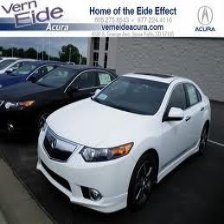

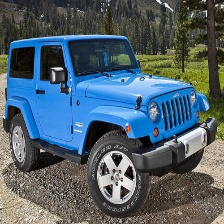

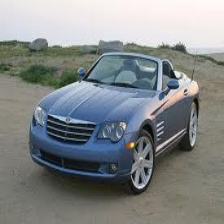

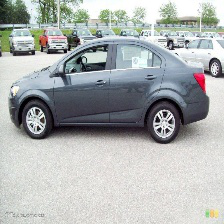

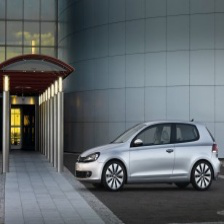

In [27]:
for i in list(result.select('_c0').toPandas()['_c0']):
  display(Image.open(os.path.join(input_dir, i)))